In [6]:
import torch
import torch.nn as nn

# 假设域索引是一个整数张量,原型特征是一个浮点数张量
domain_index = torch.tensor([0, 1, 2, 0])  # 示例域索引
prototype_feature = torch.randn(3, 128)    # 示例原型特征,维度为128,每个域一个原型特征

# 创建嵌入矩阵
num_domains = 3  # 域的数量
embedding_dim = 128  # 原型特征的维度
embedding_matrix = nn.Embedding(num_domains, embedding_dim)

# 初始化嵌入矩阵的权重为原型特征
embedding_matrix.weight.data.copy_(prototype_feature)

# 使用域索引获取相应的原型特征
domain_embedding = embedding_matrix(domain_index)



tensor([ 1.0085,  0.3429,  0.9291, -0.4529, -0.0612,  0.8645, -0.9344,  1.7619,
         0.2587, -0.3999,  2.1272,  0.8673, -0.4056,  1.1196, -0.6579,  1.0072,
         1.3790, -1.6521, -0.0881, -0.6167,  0.7546,  1.8588,  0.0090, -0.4455,
        -0.3465, -0.4605,  0.3660,  0.6278, -0.8404, -0.0078, -0.1317,  0.3838,
         0.5034,  0.2046,  0.3506, -0.3273, -1.7788, -1.5325,  1.3403, -0.2390,
        -1.2482, -0.8842,  0.4724,  1.0482, -0.2481,  0.5686, -0.6626, -0.6968,
        -0.0208,  0.6879, -0.7069, -0.4792,  0.5180, -0.5167,  1.0484, -0.3269,
         0.7903, -0.2145,  0.0706,  0.4967, -1.3652,  1.2989,  0.0528, -0.7462,
         0.8845, -0.4650, -1.3593, -0.4116,  1.0752, -0.3419, -0.2680, -0.6009,
         0.7341, -1.4488, -0.3399, -0.0748, -0.3668, -0.1161,  0.4101,  1.0362,
        -0.1299, -1.3421, -0.8965, -2.4597, -0.0564,  0.0997, -0.2508,  0.8922,
         1.1697, -0.6091,  0.4711, -0.6854, -1.8217, -0.6290, -0.5403, -0.0521,
        -0.4597,  1.2994, -0.7541,  0.17

In [8]:
print(domain_embedding[3])  # 输出域索引对应的原型特征

tensor([ 1.0085,  0.3429,  0.9291, -0.4529, -0.0612,  0.8645, -0.9344,  1.7619,
         0.2587, -0.3999,  2.1272,  0.8673, -0.4056,  1.1196, -0.6579,  1.0072,
         1.3790, -1.6521, -0.0881, -0.6167,  0.7546,  1.8588,  0.0090, -0.4455,
        -0.3465, -0.4605,  0.3660,  0.6278, -0.8404, -0.0078, -0.1317,  0.3838,
         0.5034,  0.2046,  0.3506, -0.3273, -1.7788, -1.5325,  1.3403, -0.2390,
        -1.2482, -0.8842,  0.4724,  1.0482, -0.2481,  0.5686, -0.6626, -0.6968,
        -0.0208,  0.6879, -0.7069, -0.4792,  0.5180, -0.5167,  1.0484, -0.3269,
         0.7903, -0.2145,  0.0706,  0.4967, -1.3652,  1.2989,  0.0528, -0.7462,
         0.8845, -0.4650, -1.3593, -0.4116,  1.0752, -0.3419, -0.2680, -0.6009,
         0.7341, -1.4488, -0.3399, -0.0748, -0.3668, -0.1161,  0.4101,  1.0362,
        -0.1299, -1.3421, -0.8965, -2.4597, -0.0564,  0.0997, -0.2508,  0.8922,
         1.1697, -0.6091,  0.4711, -0.6854, -1.8217, -0.6290, -0.5403, -0.0521,
        -0.4597,  1.2994, -0.7541,  0.17

In [1]:
import torch

# Assuming you have a list of tensors called 'tensor_list'
tensor_list = [torch.randn(64, 1) for _ in range(12)]

# Concatenate the tensors along the second dimension (dim=1)
result = torch.cat(tensor_list, dim=1)

print(result.shape)  # Output: torch.Size([64, 12])

torch.Size([64, 12])


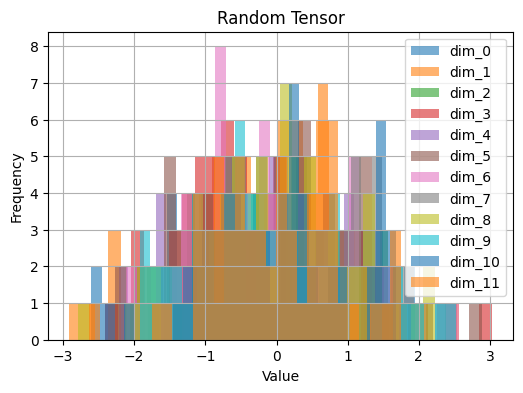

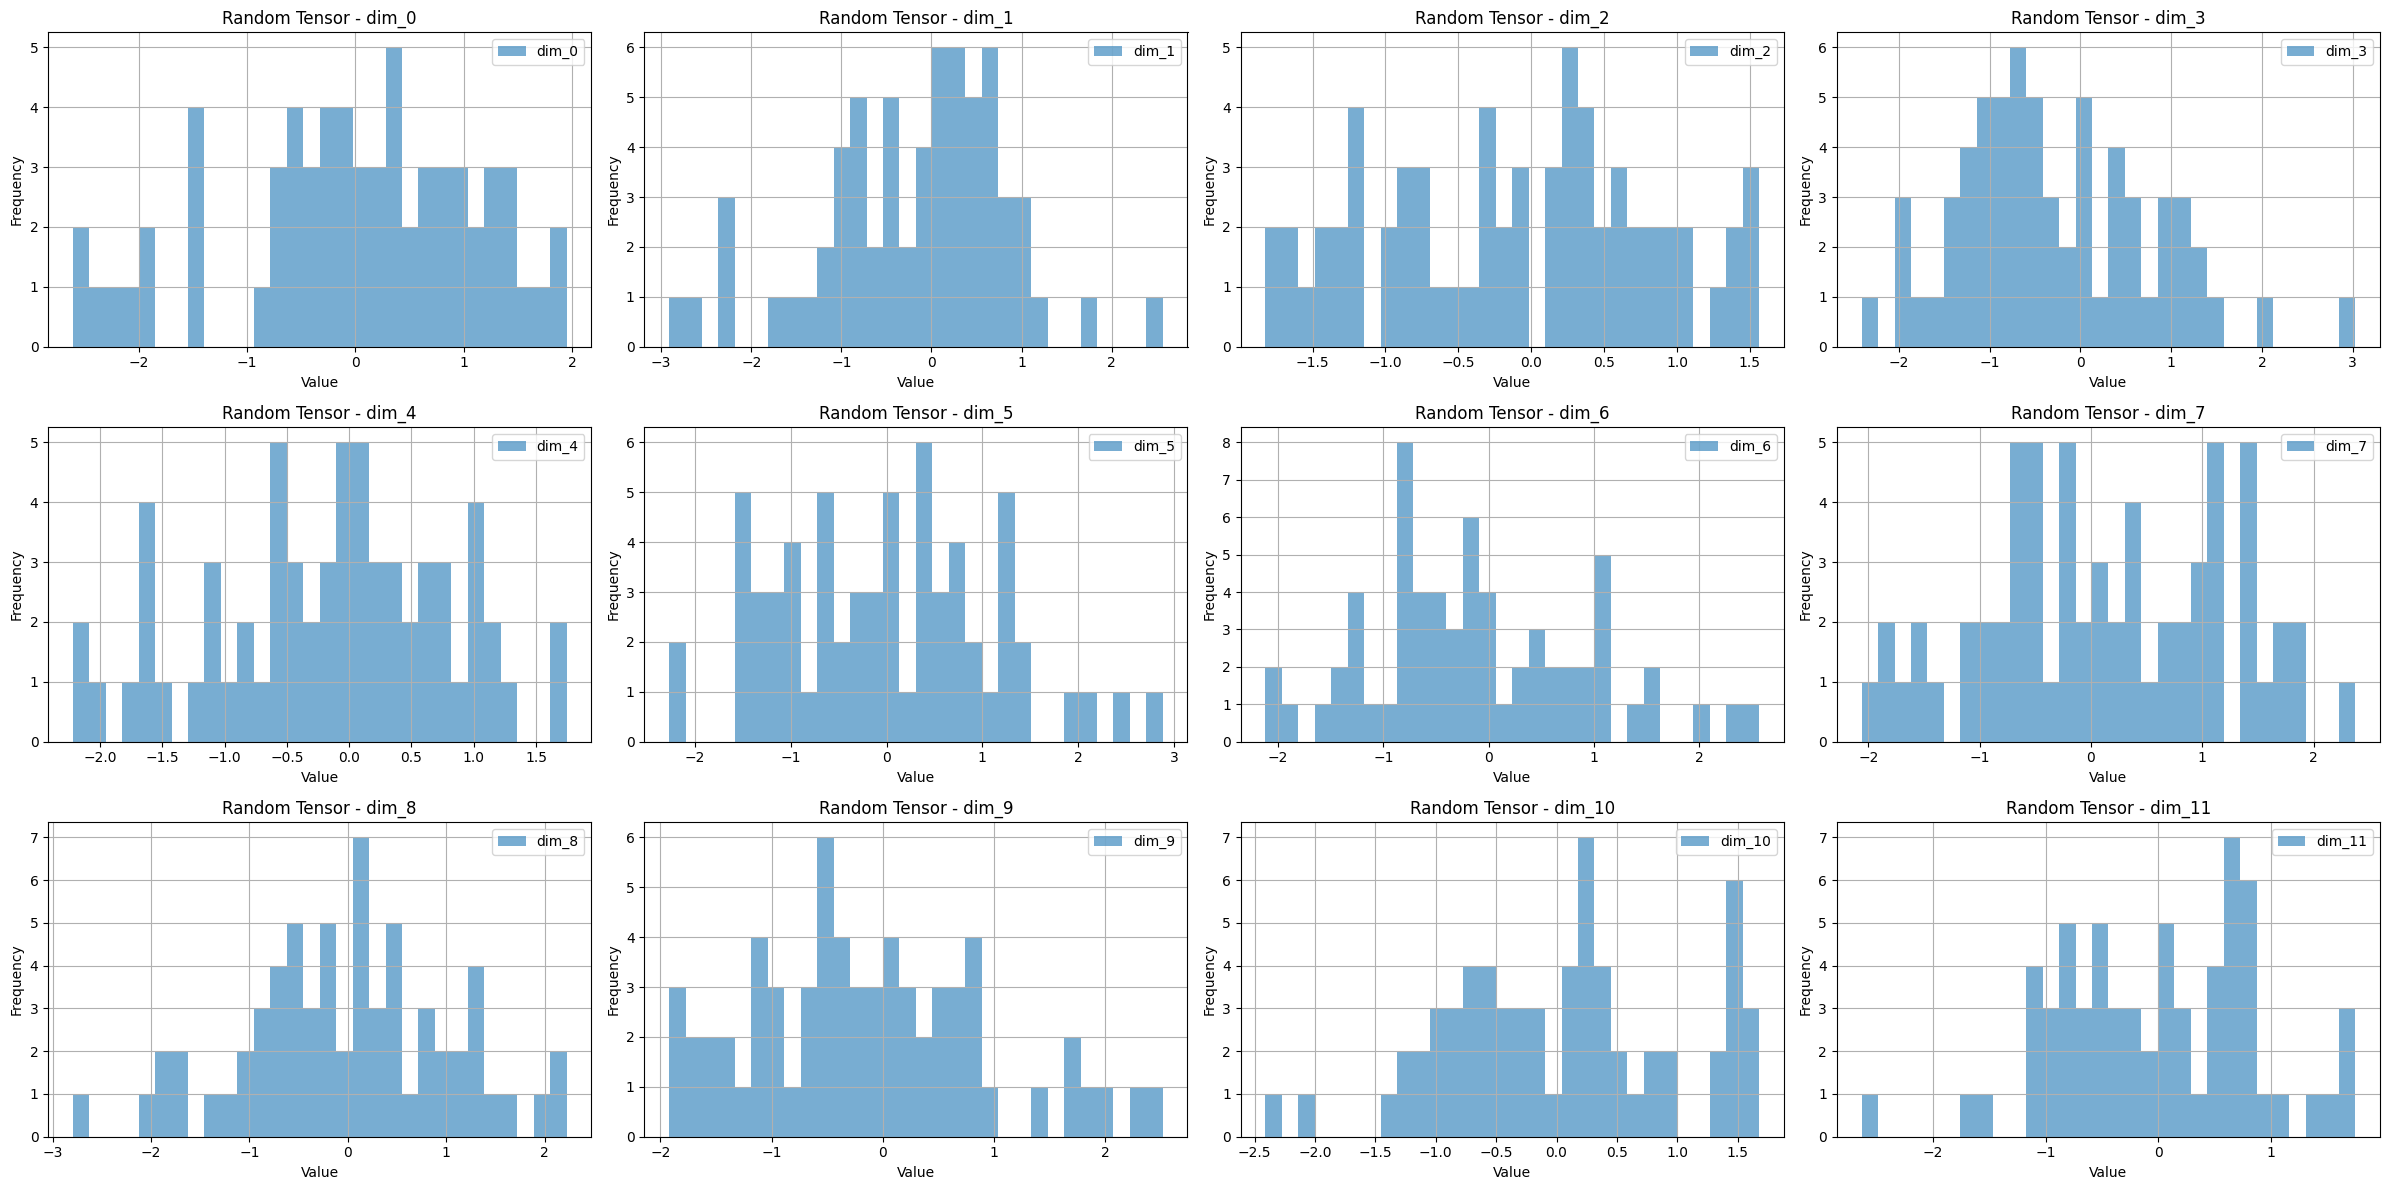

In [3]:
import torch
import matplotlib.pyplot as plt
import math

def plot_pair(tensor, title):
        
    # 创建一个图像对象
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # 在这个图像对象上绘制直方图
    for i in range(tensor.size(1)):
        ax.hist(tensor[:,i].detach().cpu().numpy().flatten(), bins=30, alpha=0.6, label="dim_{}".format(i))
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.legend()

    plt.show()
    # 保存图像到一个缓冲区
    # plt.savefig("temp_plot.png", format='png')
    # run["train/histograms/{}".format(title)].append(fig)
    # 关闭plt，避免重复显示图像
    plt.close(fig)

# 创建一个随机张量
tensor = torch.randn(64, 12)
plot_pair(tensor, "Random Tensor")


def plot_pair_seperate(tensor, title):
    # Calculate the number of rows and columns for the subplots
    num_dims = tensor.size(1)
    num_cols = 4
    num_rows = math.ceil(num_dims / num_cols)

    # Create a new figure and subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))

    # Flatten the axes array to make iterating over it easier
    axs = axs.flatten()

    # Iterate over each dimension in the second axis of the tensor
    for i in range(num_dims):
        # Plot the histogram for the current dimension on the corresponding subplot
        axs[i].hist(tensor[:,i].detach().cpu().numpy().flatten(), bins=30, alpha=0.6, label="dim_{}".format(i))
        axs[i].set_title("{} - dim_{}".format(title, i))
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        axs[i].legend()

    # Remove any unused subplots
    for i in range(num_dims, num_rows * num_cols):
        fig.delaxes(axs[i])

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Save the figure to a file
    # fig.savefig("plot.png", format='png')

    # Close the figure to free up memory
    plt.close(fig)

plot_pair_seperate(tensor, "Random Tensor")

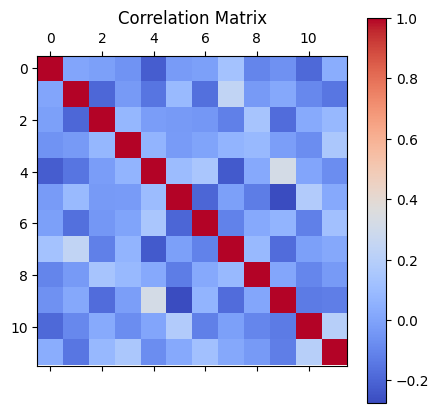

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_matrix(tensor, title):
    # Convert the tensor to a numpy array
    array = tensor.detach().cpu().numpy()

    # Compute the correlation matrix
    corr_matrix = np.corrcoef(array, rowvar=False)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(5, 5))

    # Create a heatmap from the correlation matrix
    cax = ax.matshow(corr_matrix, cmap='coolwarm')

    # Add a colorbar to the figure
    fig.colorbar(cax)

    # Set the title of the plot
    ax.set_title(title)

    # Show the plot
    plt.show()

    # Save the figure to a file
    # fig.savefig("correlation_matrix.png", format='png')

    # Close the figure to free up memory
    plt.close(fig)

# Create a random tensor
tensor = torch.randn(64, 12)
plot_correlation_matrix(tensor, "Correlation Matrix")